
data source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [63]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [64]:
#create dummies varible for the categorical column
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True, prefix='S')
#penguins_df.drop('sex', axis=1, inplace=True) create dummies will drop the cateogiral columns
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,S_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [65]:
#standardize data 
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
#from solution 
penguins_scaled = pd.DataFrame(data=X, columns=penguins_df.columns)
penguins_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,S_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


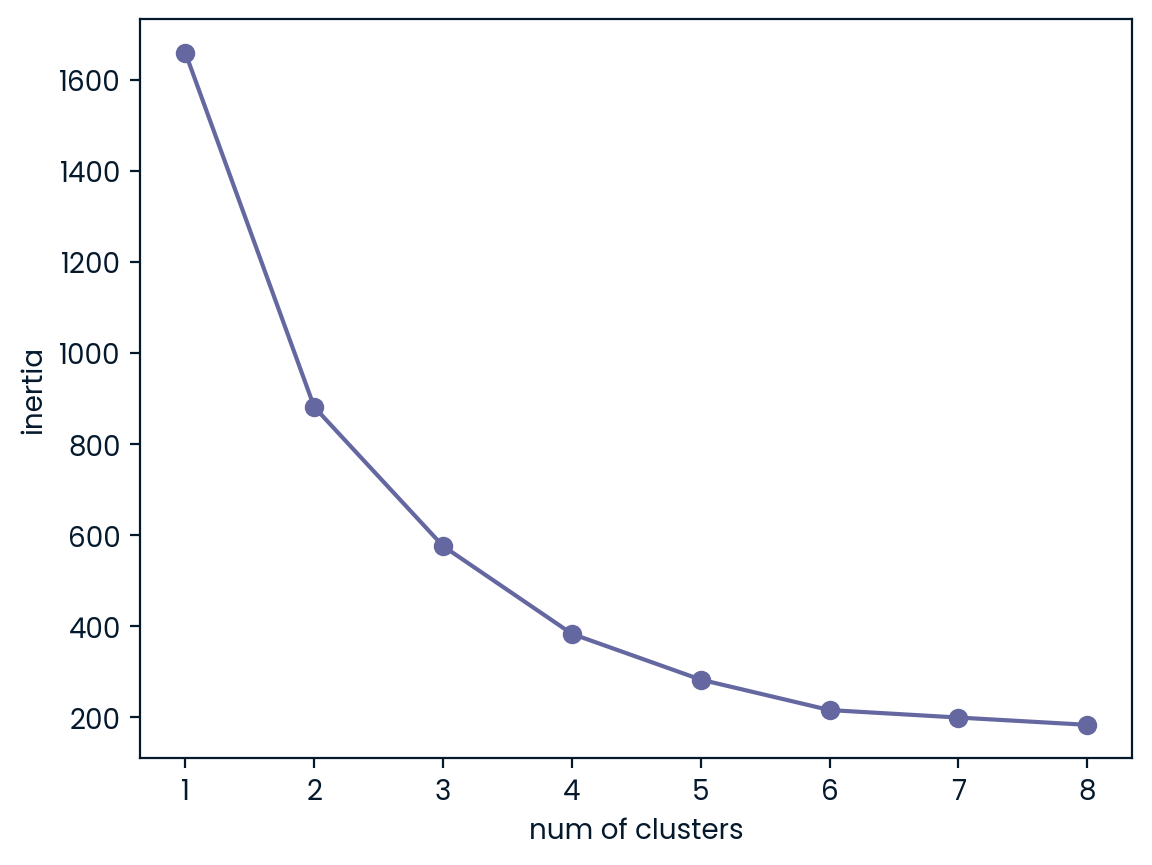

In [66]:
#optimal number of clusters: elbow method
num_cluters = range(1,9)
inertias = []
for num in num_cluters:
    model = KMeans(n_clusters = num, random_state = 1)
    model.fit(penguins_scaled)
    inertias.append(model.inertia_)
plt.plot(num_cluters, inertias, '-o')
plt.xlabel('num of clusters')
plt.ylabel('inertia')
plt.xticks(num_cluters)
plt.show()

In [67]:
#build pipeline: standardize data and cluster data 
kmeans = KMeans(n_clusters= 4, random_state= 1)
kmeans.fit(penguins_df_scaled)
penguins_df['label'] = kmeans.labels_
n_clusters = 4

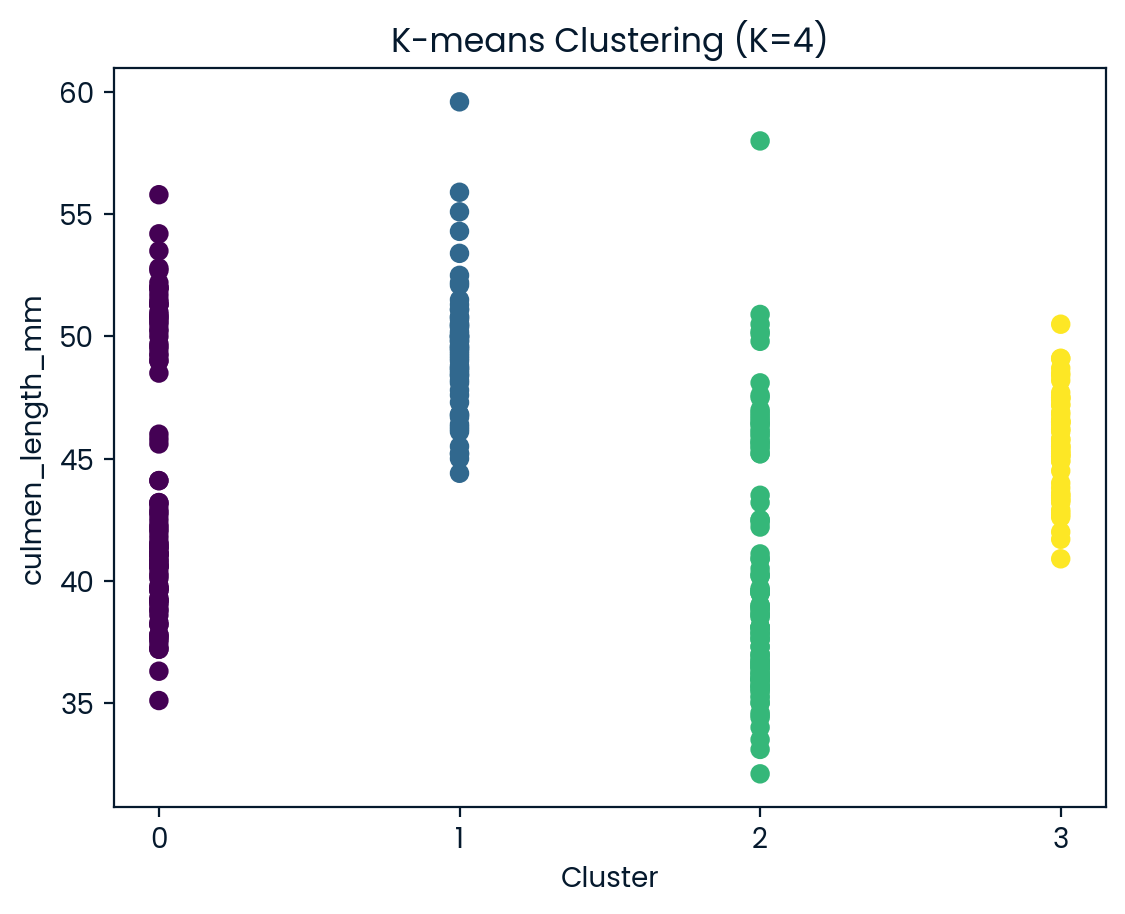

In [68]:
#from solution
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [69]:
numeric_columns = list(penguins_df.columns)
numeric_columns.remove('S_MALE')
print(numeric_columns)
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins.head()

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'label']


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,49.473770,15.718033,221.540984,5484.836066
2,40.217757,17.611215,189.046729,3419.158879
3,45.563793,14.237931,212.706897,4679.741379
